<h2> Advanced SQL Lab 

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

DB2/LINUXX8664


<h3> EXERCISE 1

Q1: Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.

In [3]:
%%sql

SELECT CPS.NAME_OF_SCHOOL, CD.COMMUNITY_AREA_NAME, CPS. AVERAGE_STUDENT_ATTENDANCE FROM CHICAGO_PUBLIC_SCHOOLS as CPS 
LEFT OUTER JOIN CENSUS_DATA as CD on CPS.COMMUNITY_AREA_NUMBER = CD.COMMUNITY_AREA_NUMBER
WHERE HARDSHIP_INDEX = 98;

 * ibm_db_sa://vbm31394:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,community_area_name,average_student_attendance
George Washington Carver Military Academy High School,Riverdale,91.60%
George Washington Carver Primary School,Riverdale,90.90%
Ira F Aldridge Elementary School,Riverdale,92.90%
William E B Dubois Elementary School,Riverdale,93.30%


Q2: Write and execute a SQL query to list all crimes that took place at a school. Include case number, crime type and community name.

In [4]:
%%sql
SELECT CD.COMMUNITY_AREA_NAME, CCD.CASE_NUMBER, CCD.PRIMARY_TYPE FROM CENSUS_DATA as CD right outer join 
CHICAGO_CRIME_DATA as CCD on CCD.COMMUNITY_AREA_NUMBER = CD.COMMUNITY_AREA_NUMBER
WHERE CCD.LOCATION_DESCRIPTION Like 'SCHOOL%';

 * ibm_db_sa://vbm31394:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,case_number,primary_type
Rogers Park,HK577020,NARCOTICS
Lincoln Square,HL725506,BATTERY
Austin,HH639427,BATTERY
Austin,HS200939,CRIMINAL DAMAGE
East Garfield Park,HT315369,ASSAULT
Douglas,HP716225,BATTERY
South Shore,HL353697,BATTERY
Brighton Park,HS305355,NARCOTICS
Ashburn,JA460432,BATTERY
Ashburn,HR585012,CRIMINAL TRESPASS


<H3> EXERCISE 2

Q1: Write and execute a SQL statement to create a view showing the columns listed in the following table, with new column names as shown in the second column.

| Column name in CHICAGO_PUBLIC_SCHOOLS | Column name in view |
| --- | --- |
| NAME_OF-SCHOOL | School_Name |
| Safety_Icon | Safety_Rating |
| Family_Involvement_Icon | Family_Rating |
| Environment_Icon | Environment_Rating |
| Instruction_Icon | Instruction_Rating |
| Leaders_Icon | Leaders_Rating |
| Teachers_Icon | Teachers_Rating |

 - Write and execute a SQL statement that returns all of the columns from the view.

 - Write and execute a SQL statement that returns just the school name and leaders rating from the view.

In [21]:
%%sql

CREATE OR REPLACE view CHICAGO_SCHOOLS ("School_Name", "Safety_Rating", "Family_Rating", "Environment_Rating", "Instruction_Rating",
                             "Leaders_Rating", "Teachers_Rating")as 
SELECT NAME_OF_SCHOOL, "Safety_Icon", "Family_Involvement_Icon", "Environment_Icon", "Instruction_Icon",
"Leaders_Icon", "Teachers_Icon" FROM CHICAGO_PUBLIC_SCHOOLS;

SELECT * from CHICAGO_SCHOOLS;


 * ibm_db_sa://vbm31394:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.
Done.


School_Name,Safety_Rating,Family_Rating,Environment_Rating,Instruction_Rating,Leaders_Rating,Teachers_Rating
Abraham Lincoln Elementary School,Very Strong,Very Strong,Strong,Strong,Weak,Strong
Adam Clayton Powell Paideia Community Academy Elementary School,Average,Strong,Strong,Very Strong,Weak,Strong
Adlai E Stevenson Elementary School,Strong,NDA,Average,Weak,Weak,NDA
Agustin Lara Elementary Academy,Average,Average,Average,Weak,Weak,Average
Air Force Academy High School,Average,Strong,Strong,Average,Weak,Average
Albany Park Multicultural Academy,Strong,Weak,Strong,Strong,Weak,Average
Albert G Lane Technical High School,Very Strong,NDA,Strong,Average,Weak,NDA
Albert R Sabin Elementary Magnet School,Strong,NDA,Weak,Very Weak,Weak,NDA
Alcott High School for the Humanities,Strong,NDA,Strong,Average,Weak,NDA
Alessandro Volta Elementary School,Average,Strong,Weak,Weak,Weak,Average


In [6]:
%%sql 
SELECT "School_Name", "Leaders_Rating" from CHICAGO_SCHOOLS;

 * ibm_db_sa://vbm31394:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


School_Name,Leaders_Rating
Abraham Lincoln Elementary School,Weak
Adam Clayton Powell Paideia Community Academy Elementary School,Weak
Adlai E Stevenson Elementary School,Weak
Agustin Lara Elementary Academy,Weak
Air Force Academy High School,Weak
Albany Park Multicultural Academy,Weak
Albert G Lane Technical High School,Weak
Albert R Sabin Elementary Magnet School,Weak
Alcott High School for the Humanities,Weak
Alessandro Volta Elementary School,Weak


For exercise 3 and 4 include screenshots of code from IBM Db2

<H3> EXERCISE 3

Q1: Write the structure of a query to create or replace a stored procedure called UPDATE_LEADERS_SCORE that takes a in_School_ID parameter as an integer and a in_Leader_Score parameter as an integer. Don't forget to use the #SET TERMINATOR statement to use the @ for the CREATE statement terminator.

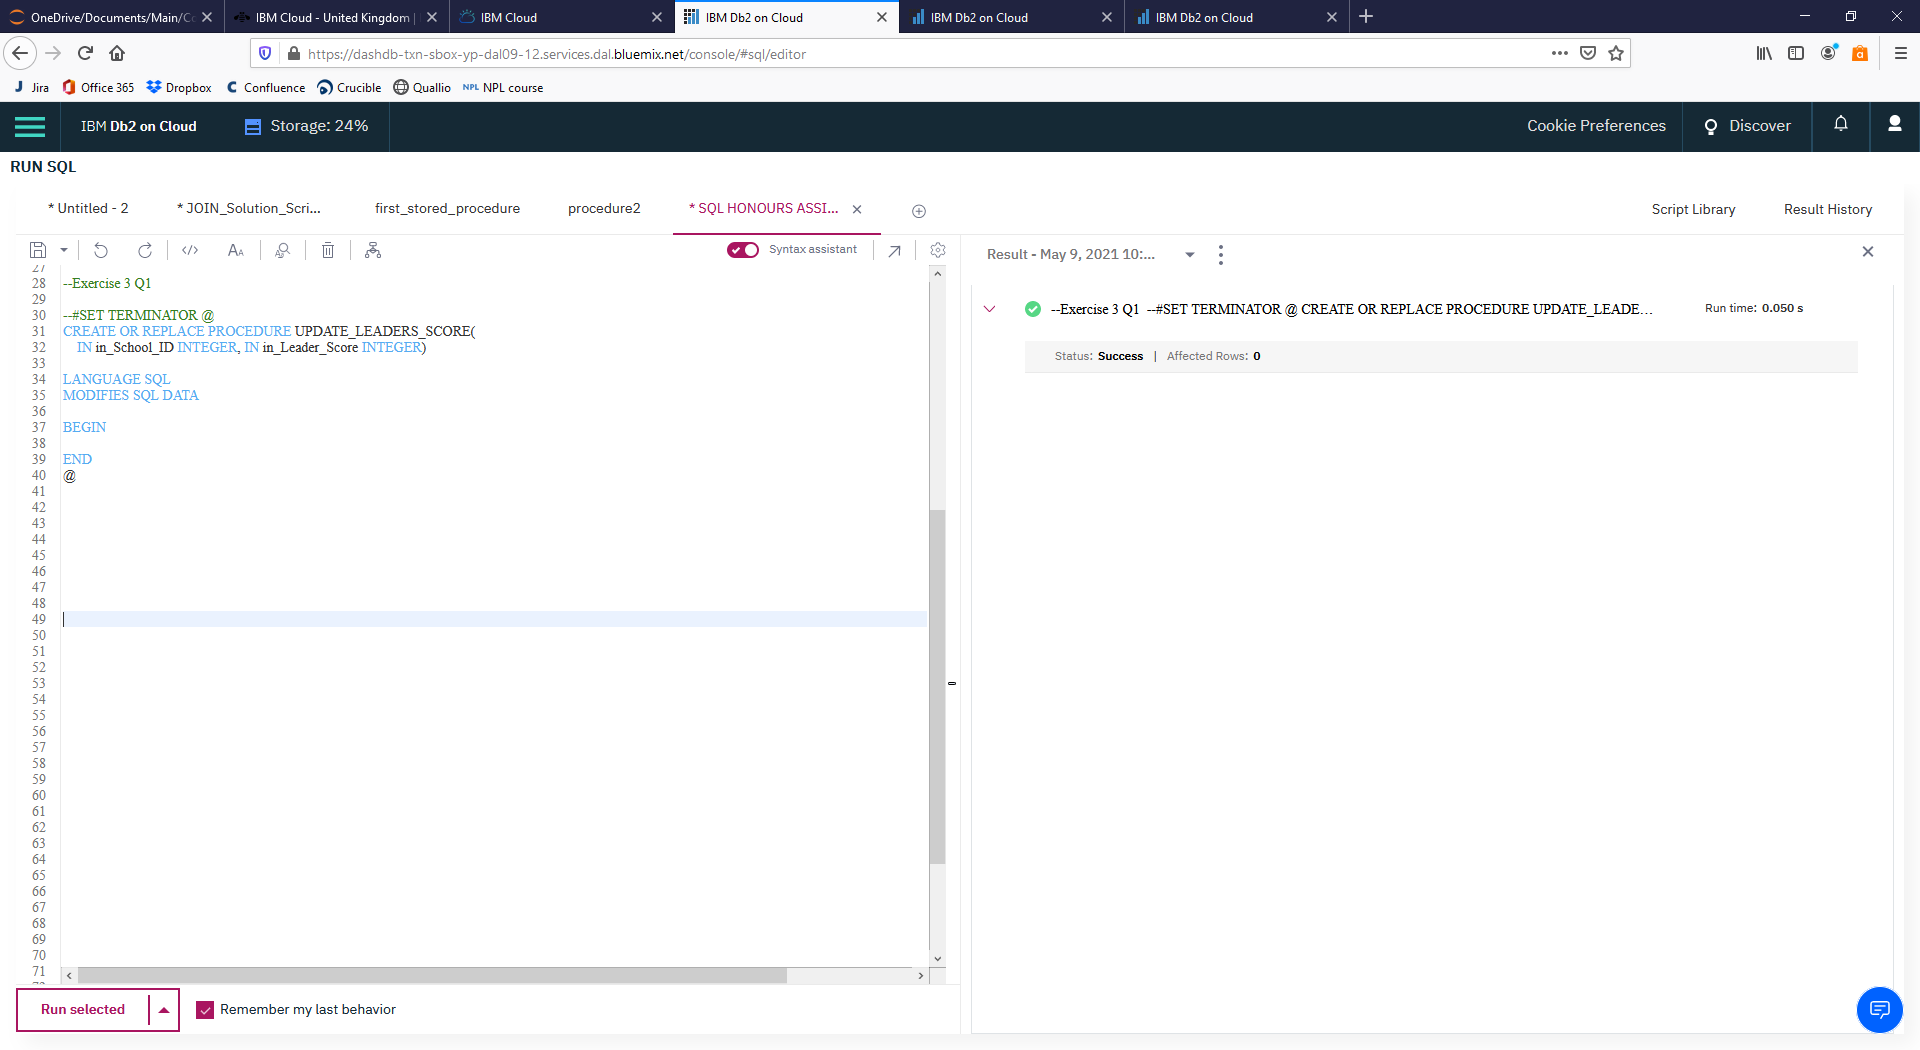

Q2: Inside your stored procedure, write a SQL statement to update the Leaders_Score field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID to the value in the in_Leader_Score parameter.

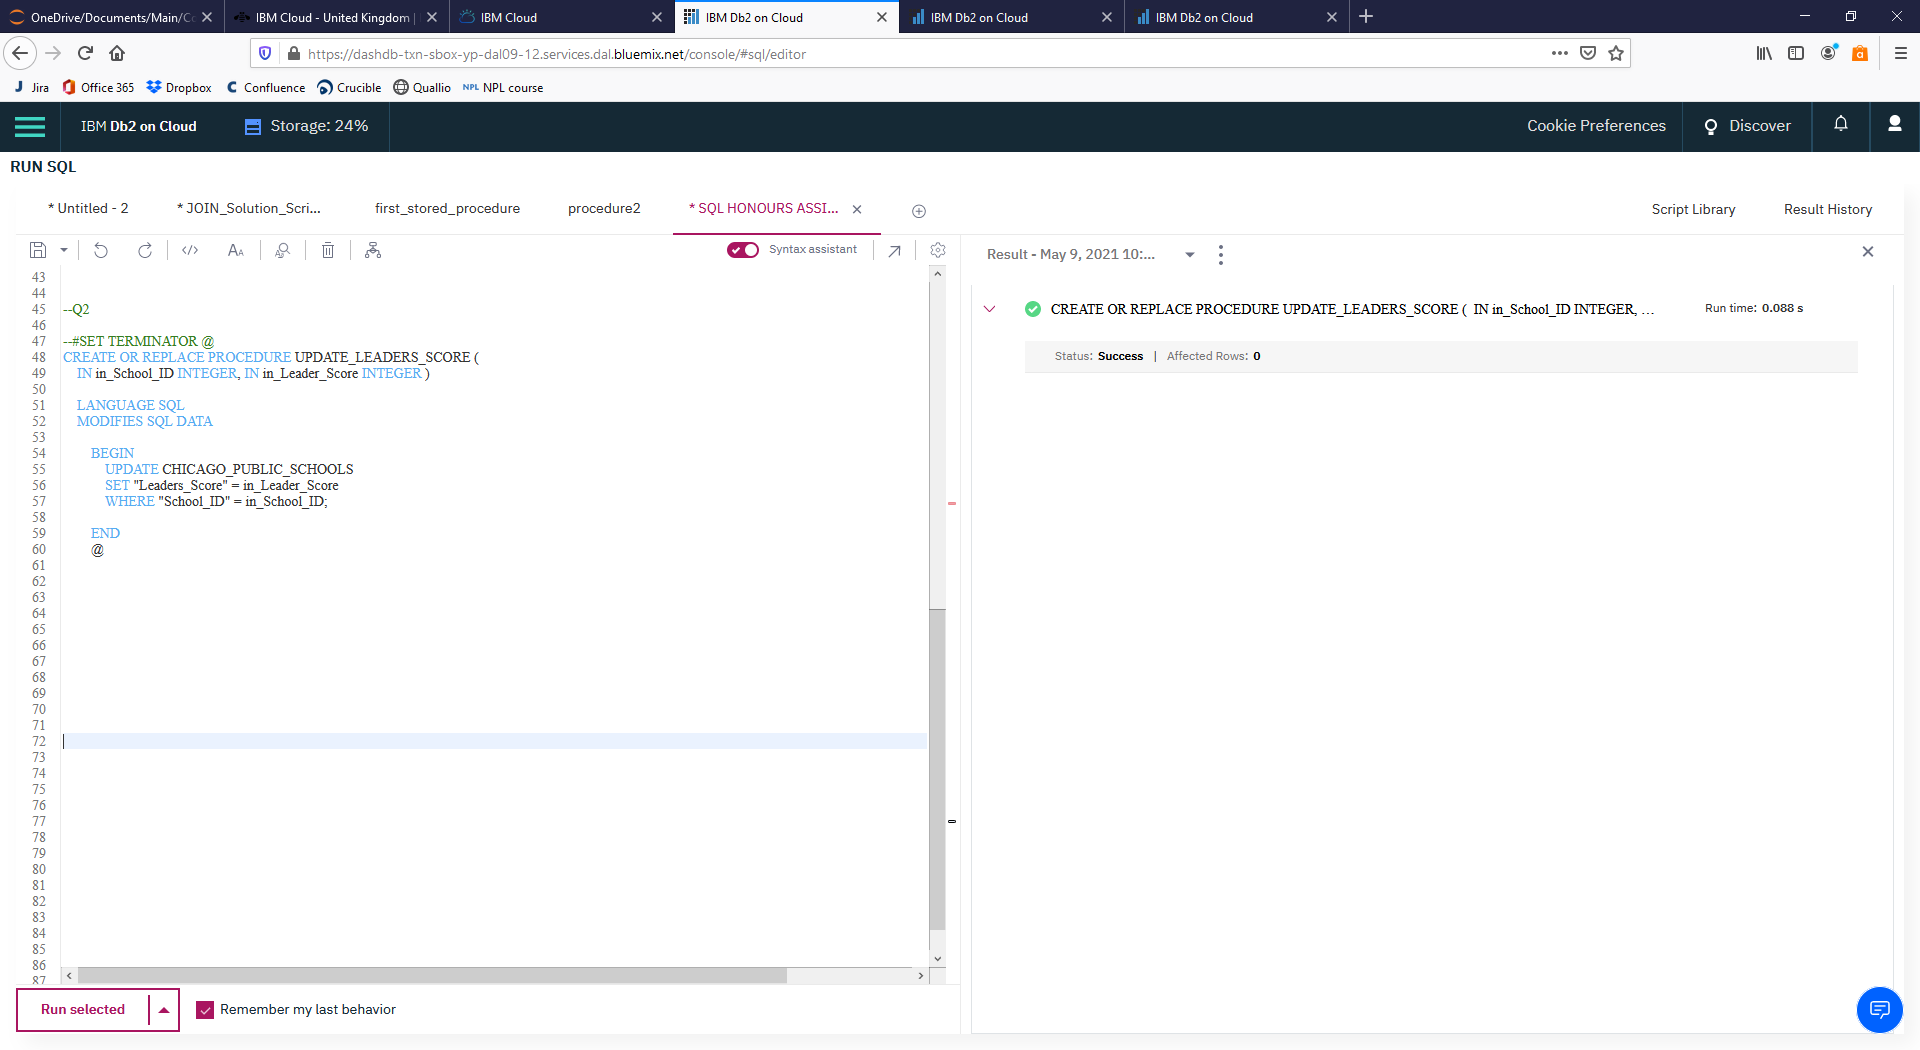

Q3: Inside your stored procedure, write a SQL IF statement to update the Leaders_Icon field in the CHICAGO_PUBLIC_SCHOOLS table for the school identified by in_School_ID using the following information.

| Score lower limit | Score Upper limit | Icon |
| --- | --- | --- |
| 80 | 99 | Very Strong |
| 60 | 79 | Strong |
| 40 | 59 | Average |
| 20 | 39 | Weak |
| 0 | 19 | Very Weak |



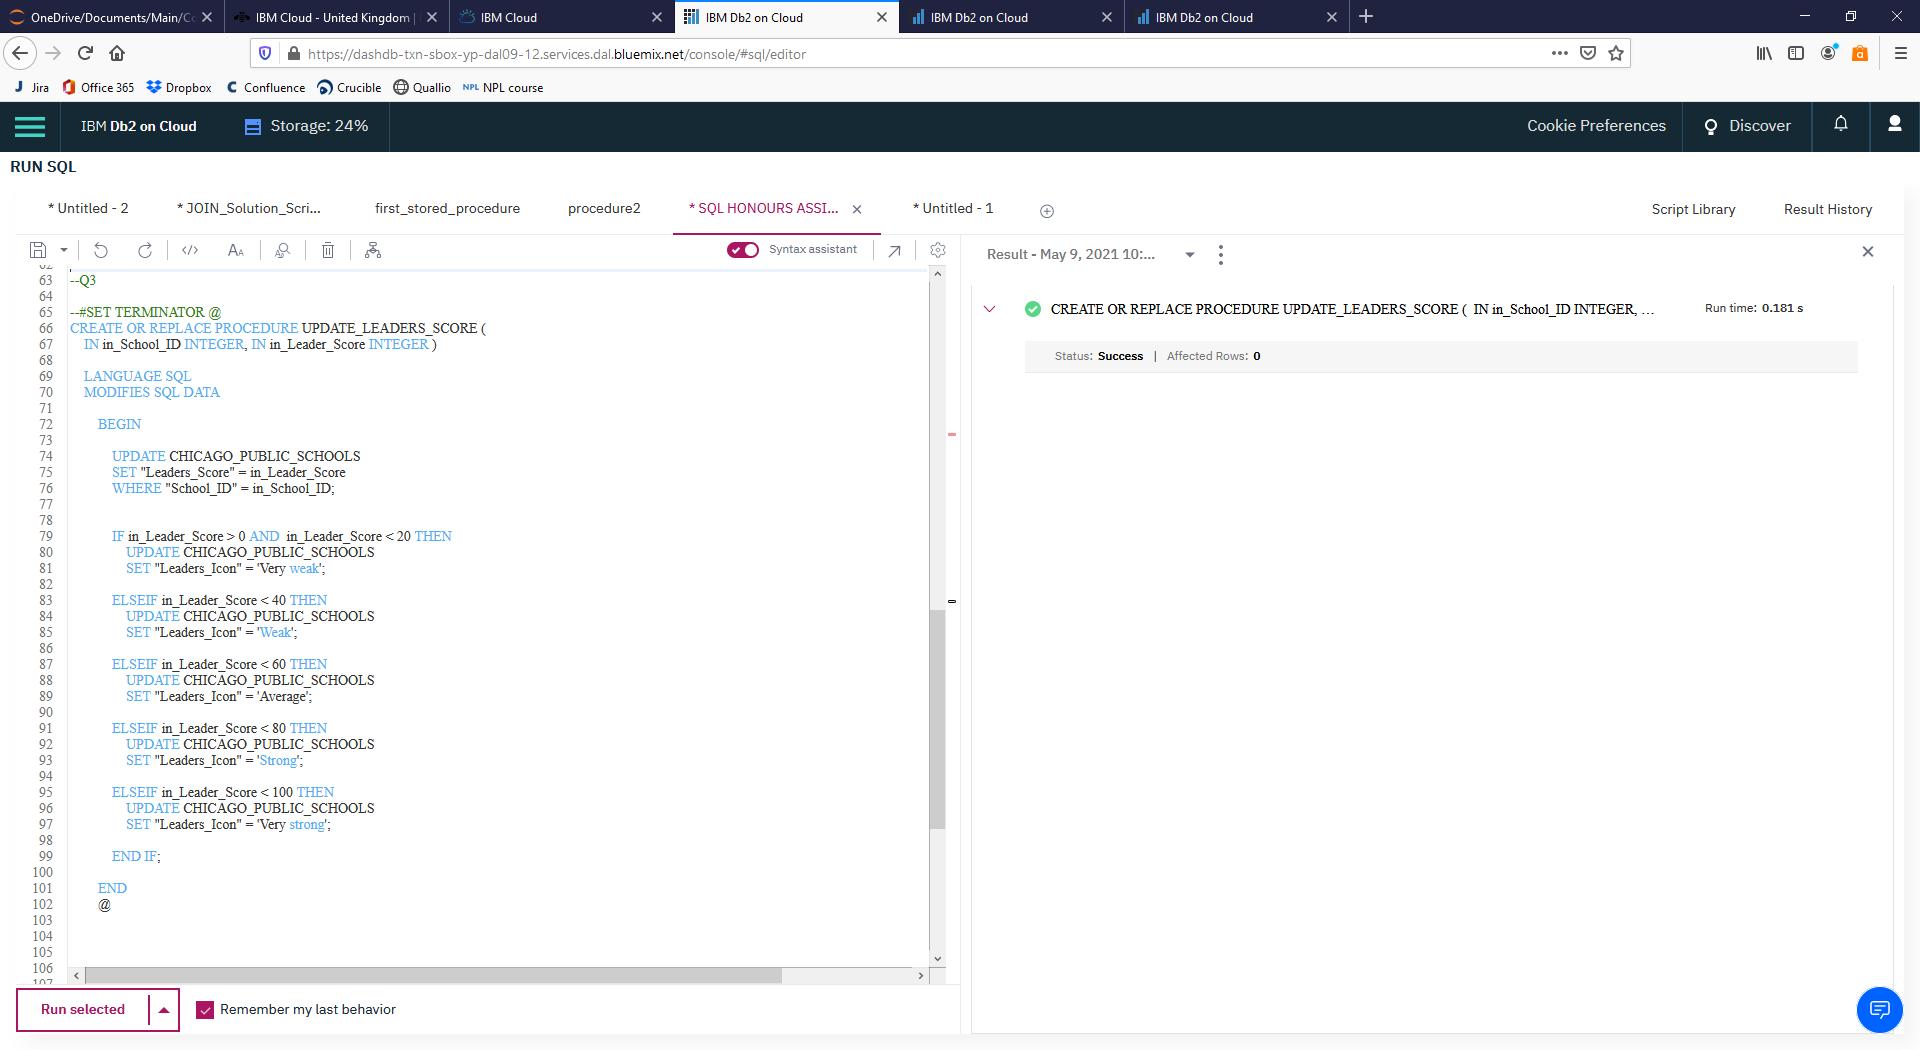

Q4: 
- Write a query to call the stored procedure, passing a valid school ID and a leader score of 50, to check that the procedure works as expected.

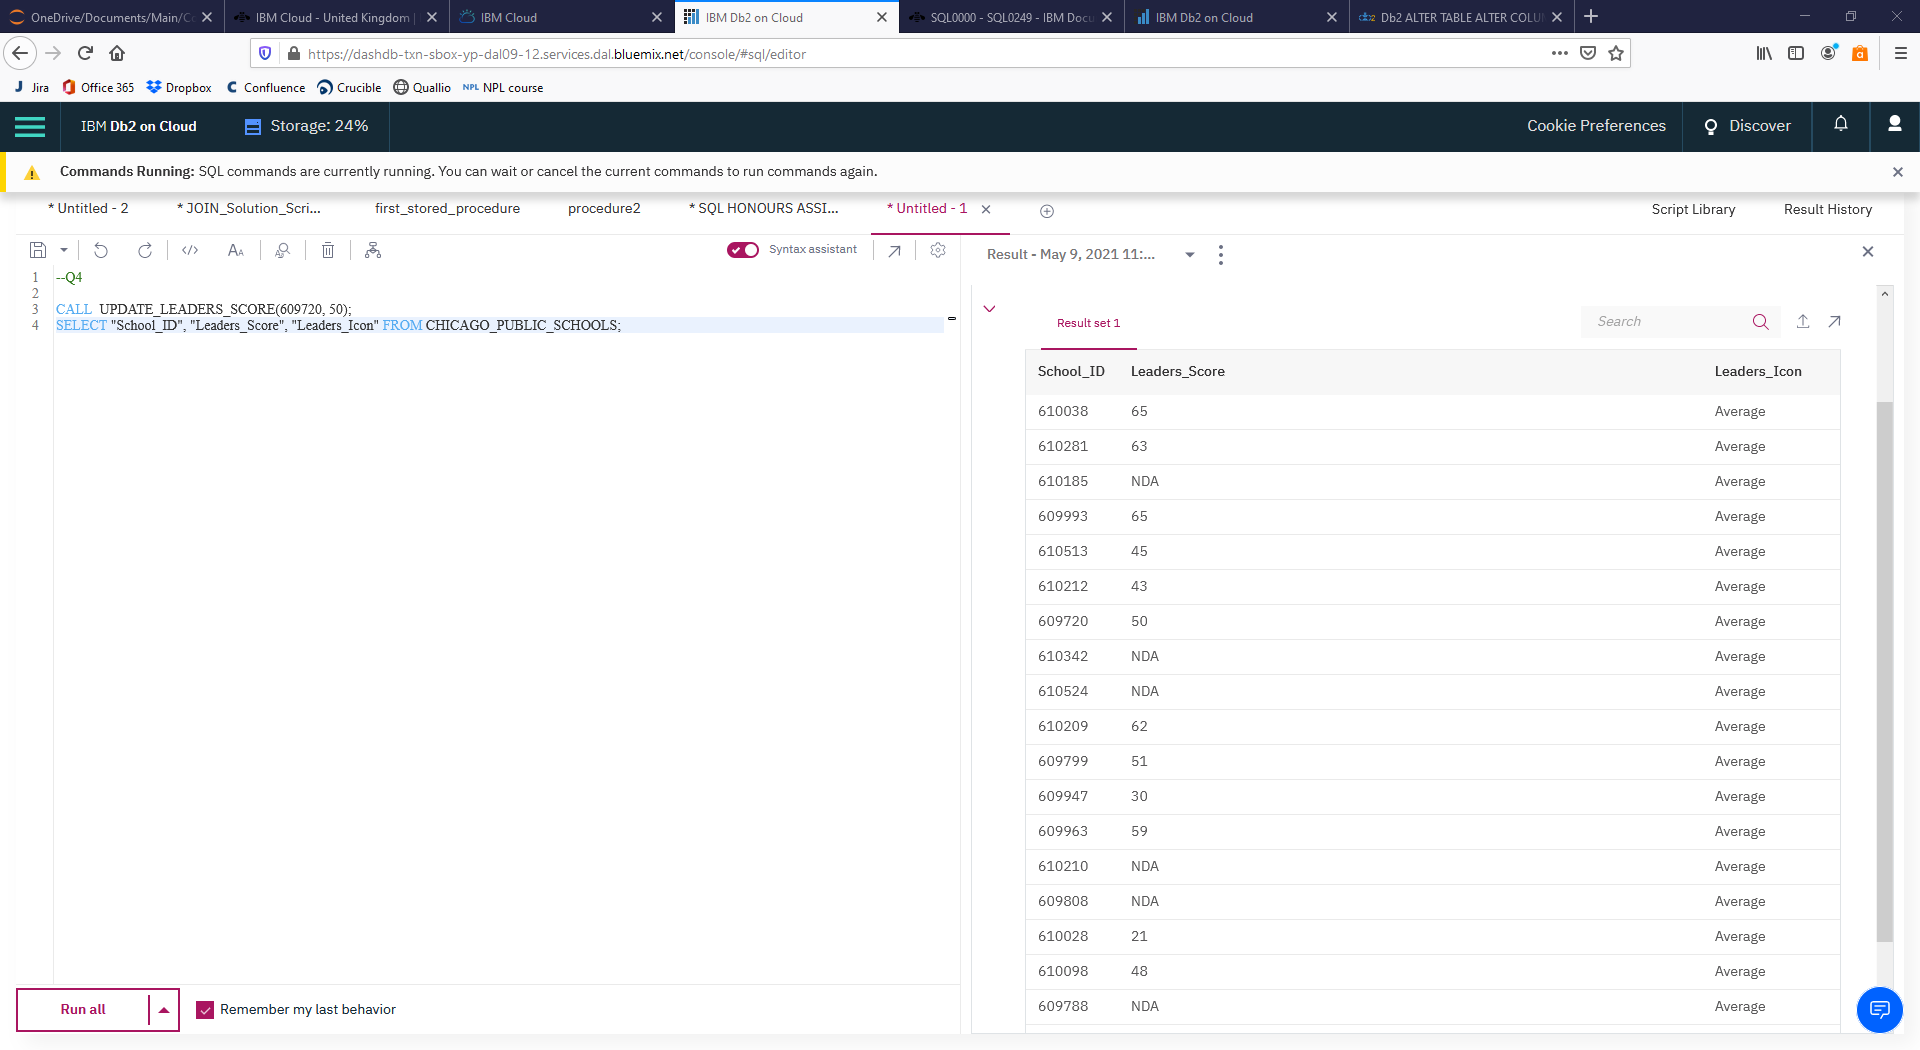

<H3> Exercise 4 

Q1
- Update your stored procedure definition. Add a generic ELSE clause to the IF statement that rolls back the current work if the score did not fit any of the preceding categories. 
Take a screenshot showing the SQL query.

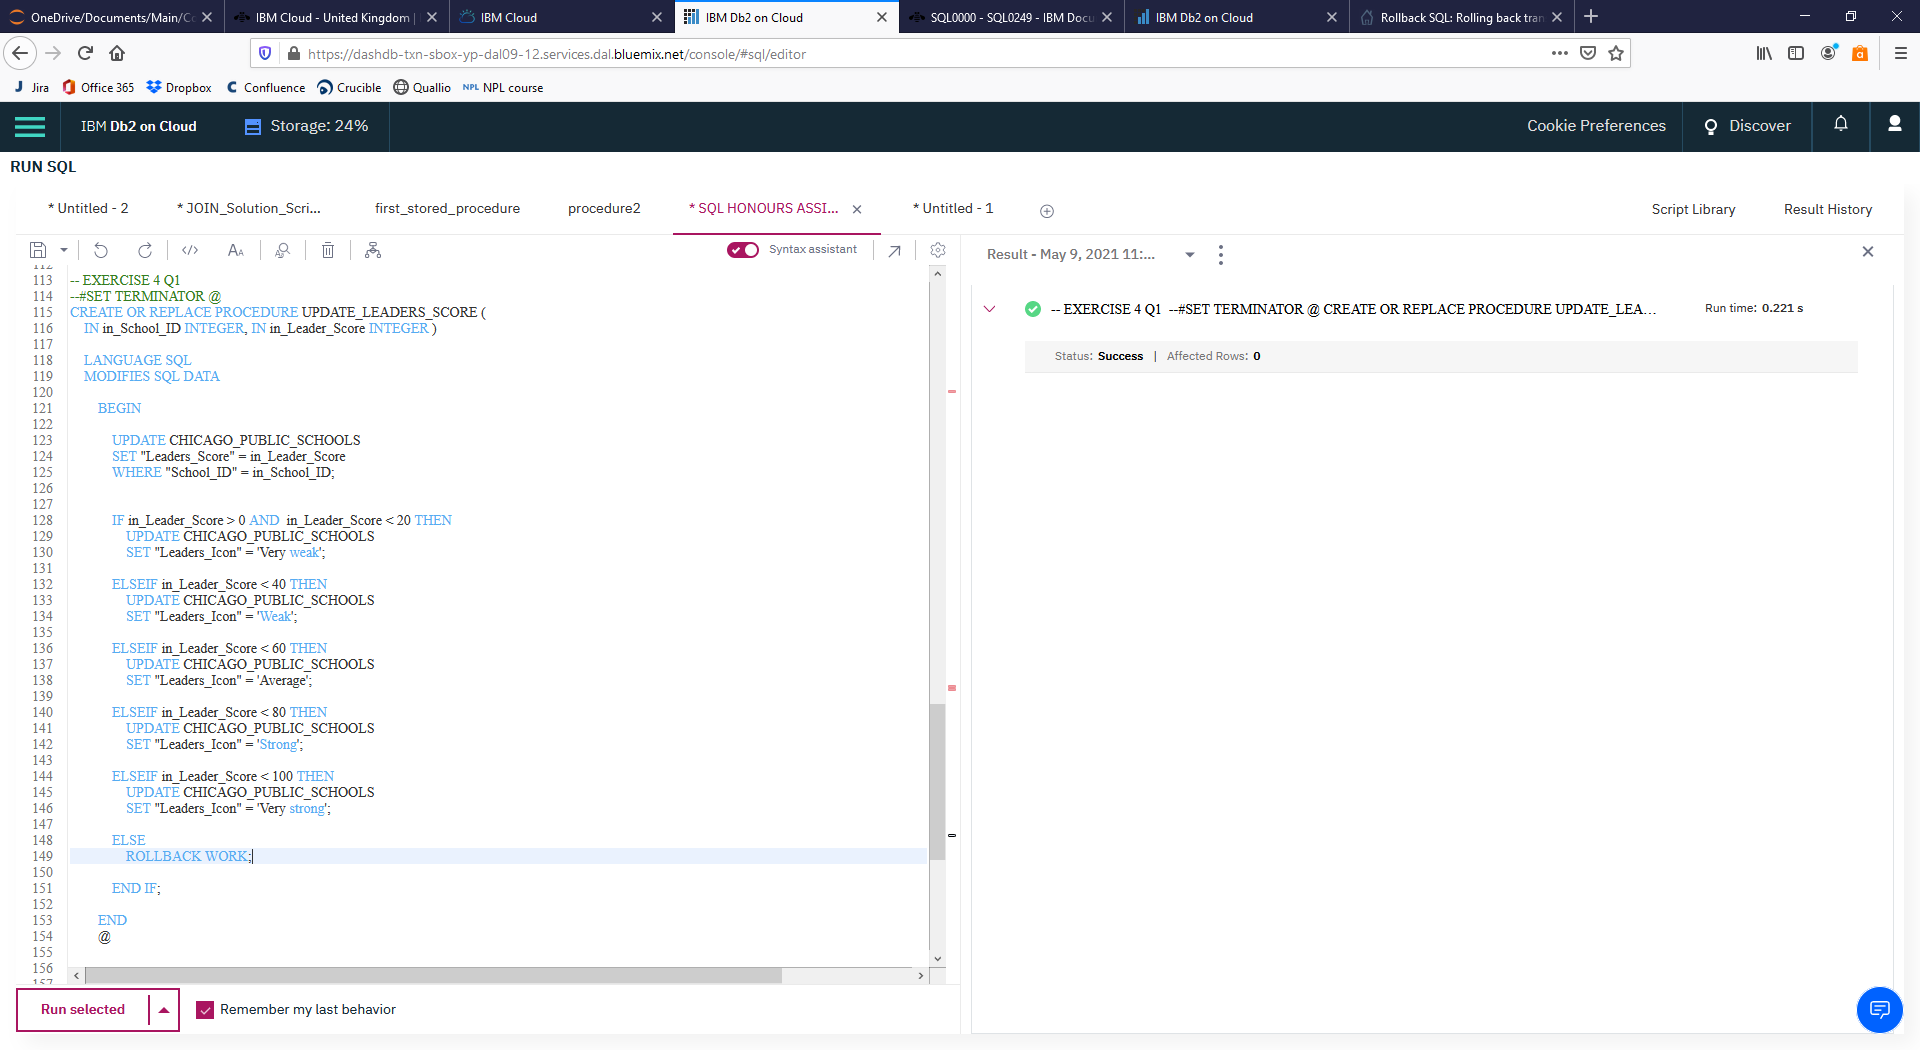

Q2
Update your stored procedure definition again. Add a statement to commit the current unit of work at the end of the procedure. 

Take a screenshot showing the SQL query.

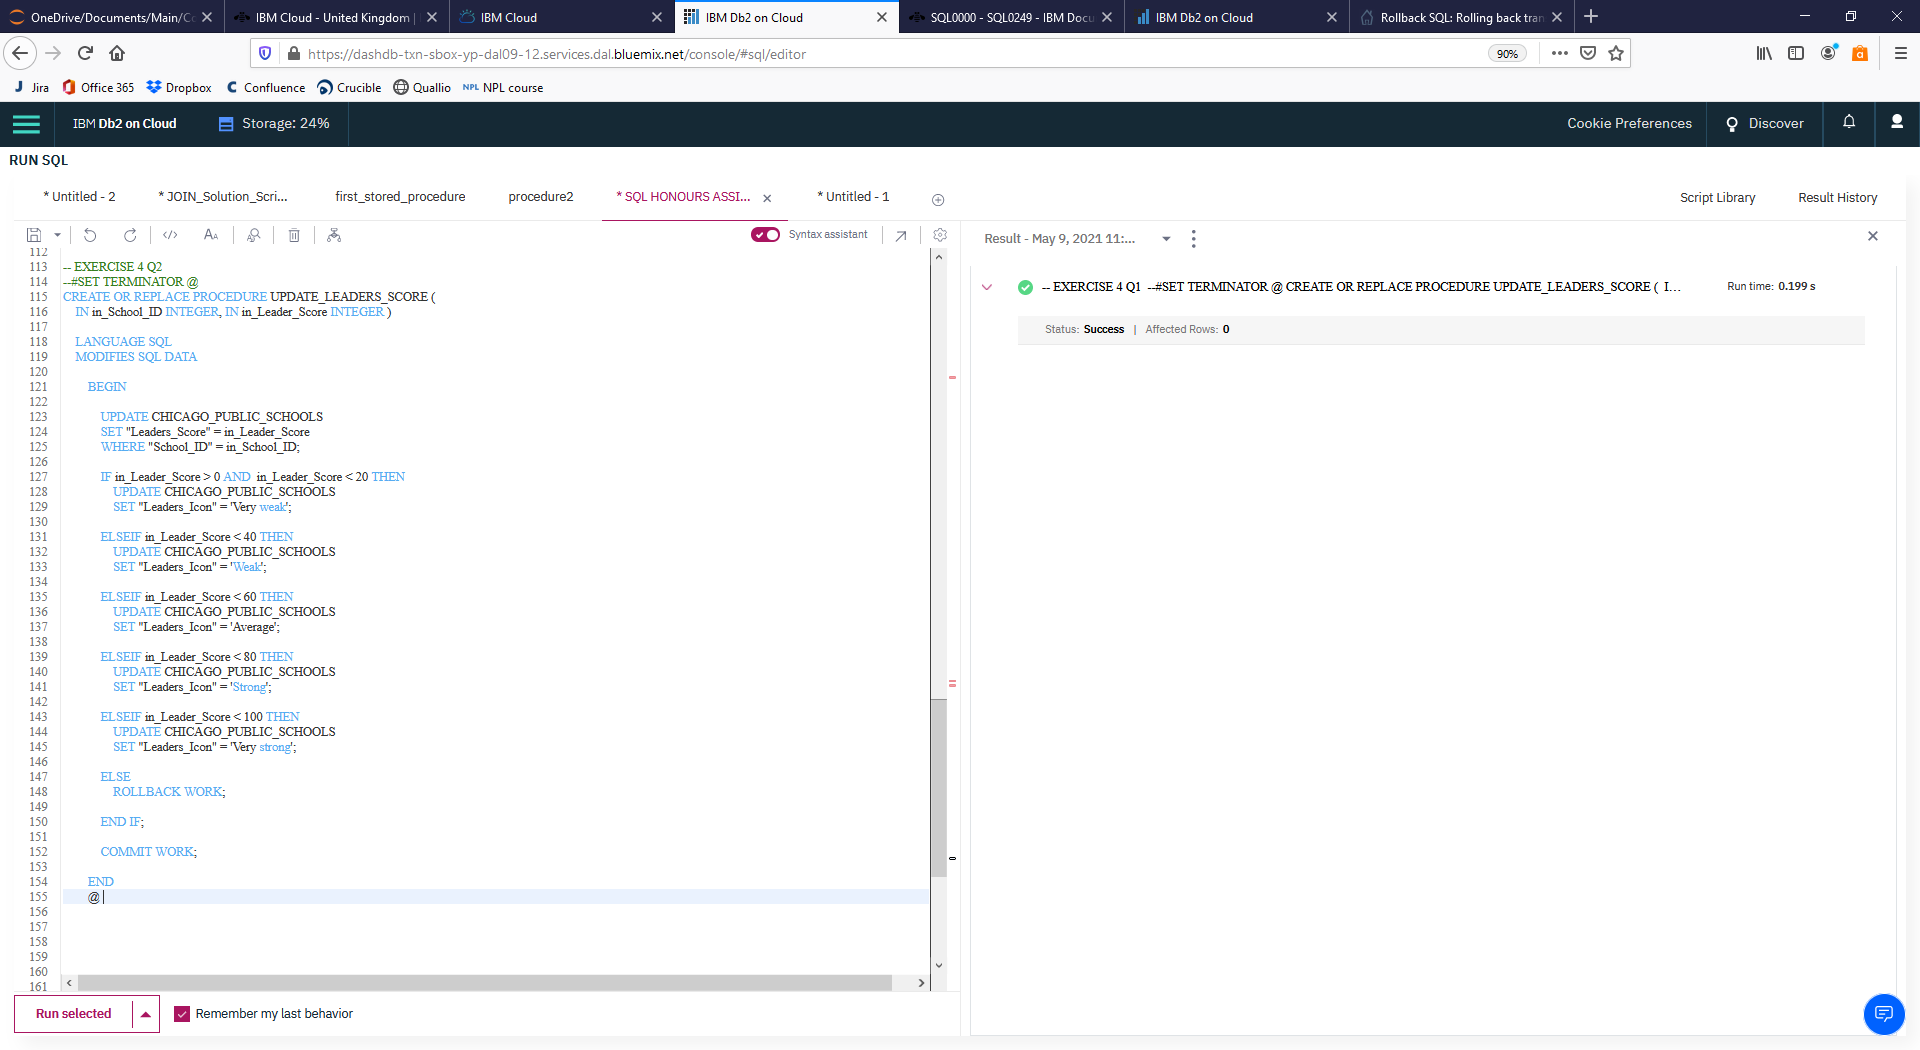